# **Subtask 2**: Semantic type of premise classification

This Notebook contains all the code that was used for the task of semantic type of premise identification

Please note that currently this notebook is setup to obtain results on our own annotated test set for this task. This means that the variable <i>original_annotations</i> is set to <b>False</b>

Other prompt templates that we experimented with can be found in the <i>prompt templates</i> notebook

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Use our own annotations and initialize GPT-NEO model and tokenizer
original_annotations = False
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")

In [ ]:
# Validation set that was used for prompt template engineering
val_sents = ["Another reason for my opinion is that CoD doesn't really have anything astoundingly different from other games of the same genre.",
             "So why would a bunch of social outcasts who get made fun of encourage hate and let such raw emotion reign supreme?",
             "a large part of this view came from something a history teacher told me 6 years ago: \"Geography Determines Destiny\", and that quote has stuck with me",
             "I am an omnivore, and my diet consists of meat and plants.",
             "Saying these people shouldn’t be allowed to become part of the country, is the same as saying they are worse,",
             "Every middle-class child in the country would receive a lower quality education if there were 55 million more around",
             "Why do I feel like chasing after girls and getting to know them when I have so many great guy friends already who I know care about me so much more?",
             "you'll still probably feel attraction for other people",
             "their chances of getting shot would also increase"]

val_types = ['Ethos',
             'Pathos',
             'Ethos',
             'Ethos',
             'Pathos',
             'Logos',
             'Logos',
             'Pathos',
             'Logos']

val_tuples = list(zip(val_sents, val_types))
df_val = pd.DataFrame(val_tuples, columns=['Premise','Type']) 

In [ ]:
# Initialize test set
df = pd.read_csv('../data/subtask-2/gold_test.csv', index_col=0)

In [ ]:
# GPT-NEO to fill out the prompt
neo_predictions = []
for premise in df['premise'].to_list():
    if original_annotations:
        print('moi')
        prompt = (f"""Premise: Therefore, there will always be a market for meat and other animal products
            Type: logos_pathos
            ###
            Premise: How often do we get to go back and correct our mistakes in real life, anyway?
            Type: logos_pathos
            ###
            Premise: I'l begin by saying it has never happened to me
            Type: ethos
            ###
            Premise: Individuals who are extraordinarily qualified for a position but come from a region/social background without those connections enter a networking-friendly employment opportunity at a disadvantage.
            Type: logos_pathos
            ###
            Premise: I'm an immigrant and a Muslim neither of which is or should be a deterrent from joining
            Type: ethos
            ###
            Premise: how many of these women wouldn't be having financial troubles if there wasn't competition from cheap illegal labor to keep wages lower
            Type: logos_pathos
            ###
            Premise: {premise}
            Type:"""
        )
    else:
        print('here')
        # 1. Logos, 2. Pathos, 3. Ethos
        prompt = (f"""Premise: How often do we get to go back and correct our mistakes in real life, anyway?
            Type: 2
            ###
            Premise: Therefore, there will always be a market for meat and other animal products
            Type: 1
            ###
            Premise: I'l begin by saying it has never happened to me
            Type: 3
            ###
            Premise: Individuals who are extraordinarily qualified for a position but come from a region/social background without those connections enter a networking-friendly employment opportunity at a disadvantage.
            Type: 1
            ###
            Premise: I'm an immigrant and a Muslim neither of which is or should be a deterrent from joining
            Type: 3
            ###
            Premise: how many of these women wouldn't be having financial troubles if there wasn't competition from cheap illegal labor to keep wages lower
            Type: 2
            ###
            Premise: {premise}
            Type:"""
        )

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids

    gen_tokens = model.generate(
        input_ids,
        temperature=0.8,
        min_length=1,
        length_no_input=True,
        end_sequence='\n###',
        remove_end_sequence=True,
        remove_input=True
    )

    gen_text = tokenizer.batch_decode(gen_tokens)[0]
    # Remove input prompt from the output
    strs = gen_text.replace(prompt,"")
    neo_predictions.append(strs.strip())

if original_annotations:
    df['neo_pred_original'] = neo_predictions
else:
    df['neo_pred'] = neo_predictions

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 425, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 431, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 414, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 429, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 410, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 413, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 420, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 441, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 403, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 408, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 405, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 424, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 438, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 427, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 406, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 406, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 432, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 415, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 420, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 405, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 400, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 432, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 404, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 410, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 397, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 398, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 409, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 404, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 408, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 429, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 401, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 418, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 421, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 410, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 412, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 443, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 415, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 405, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 402, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 407, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 400, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 442, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 406, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 411, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 405, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 432, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 422, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 407, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 419, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 416, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 416, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 423, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 422, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 406, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 437, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 399, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 414, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 409, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 405, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 416, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 412, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 403, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 408, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 400, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 407, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 410, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 403, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 424, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 412, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 418, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 419, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 417, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 395, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 400, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 415, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 410, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 400, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 424, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 406, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 428, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 399, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 395, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 405, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


1
here
1


In [ ]:
df

,Unnamed: 0.1,document,file_path,split,premise,gold,our_type,Unnamed: 7,type,neo_pred,neo_pred_keep
66,101,21,v2.0/positive/21.xml,positive,I know that the chocolates I love to eat cont...,logos,logos,logos,logos_pathos,1,1
18,23,21,v2.0/positive/21.xml,positive,which you see frequently among people in empa...,ethos,ethos,ethos,logos_pathos,1,1
42,65,79,v2.0/negative/79.xml,negative,An aborted fetus is likely to have been a less...,logos,logos,logos,logos_pathos,1,1
67,102,19,v2.0/positive/19.xml,positive,As for the “They’re not risking their lives fo...,logos,pathos,logos,logos_pathos,1,1
55,84,94,v2.0/negative/94.xml,negative,As if creating jobs for americans is morally s...,pathos,pathos,pathos,logos_pathos,1,1
...,...,...,...,...,...,...,...,...,...,...,...
76,117,248,v2.0/negative/248.xml,negative,"other than anecdotal evidence, I haven't seen ...",logos,logos,logos,logos_pathos,1,1
84,128,79,v2.0/positive/79.xml,positive,the man tries to show the woman how non-threat...,logos,logos,logos,logos_pathos,1,1
9,12,95,v2.0/positive/95.xml,positive,their will always be a few bad apples,logos,logos,logos,logos_pathos,1,1
11,14,18,v2.0/positive/18.xml,positive,there is no afterlife,logos,??,x,logos_pathos,1,1


In [ ]:
df['neo_pred_keep'] = df['neo_pred']

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


\begin{tabular}{lrrrr}
\toprule
{} &  precision &  recall &  f1-score &  support \\
\midrule
ethos        &       0.00 &    0.00 &      0.00 &     23.0 \\
logos        &       0.49 &    1.00 &      0.66 &     41.0 \\
pathos       &       0.00 &    0.00 &      0.00 &     19.0 \\
accuracy     &       0.49 &    0.49 &      0.49 &      0.0 \\
macro avg    &       0.16 &    0.33 &      0.22 &     83.0 \\
weighted avg &       0.24 &    0.49 &      0.33 &     83.0 \\
\bottomrule
\end{tabular}



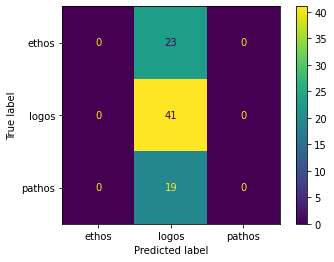

In [ ]:
# Report on gold labels and predictions, showing classification report and
# confusion matrix
def report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame.from_dict(report).transpose().round({'precision': 2, 'recall': 2, 'f1-score': 2, 'support': 0})
    print(df_report.to_latex())
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

# ORIGINAL ANNOTATIONS
if original_annotations:
    df['neo_pred_original'].replace({'logos': 'logos_pathos', 'pathos': 'logos_pathos'}, inplace=True)
    y_true = df['type'].to_list()
    y_pred = df['neo_pred_original'].to_list()
    report(y_true, y_pred)

# OUR ANNOTATIONS
else:
    repl_dict = {'1': 'logos', '2': 'pathos', '3': 'ethos'}
    df['neo_pred'] = df['neo_pred'].map(repl_dict)
    y_true = df['gold'].to_list()
    y_pred = df['neo_pred'].to_list()
    report(y_true, y_pred)